In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SanskritCharts as sc
import os


In [74]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [75]:
def GeneratengramCSV(filename, n):
    sentence = ''
    df = pd.DataFrame(columns=['ngram', 'frequency'])

    with open(filename+'.txt',encoding='utf-8') as f:
        sentence=f.read()
        # wordList = sentence.split()
        # for word in wordList:
        #     for i in range(len(word)):
        #         curr_ngram = ''
        #         if i+n < len(word):
        #             curr_ngram = word[i:i+n]
        #             InsertOrIncrease(df, 'ngram' ,curr_ngram)
        # sentence = sentence.replace(' ','')
        # print(sentence)
        for i in range(len(sentence)):
            curr_ngram = ''
            consider = True
            if i+n < len(sentence):
                for j in range(n):
                    # print(sentence[i+j],end='')
                    if sentence[i+j] not in sc.swars and sentence[i+j] not in sc.vyanjans and sentence[i+j] not in sc.matras:
                        # print('Aborinting at ',sentence[i+j],' at ',i+j,' in ',sentence[i:i+n],end='\n')
                        consider = False
                        continue
                # print()
                if consider:
                    curr_ngram = sentence[i:i+n]
                    # print(curr_ngram)
                    InsertOrIncrease(df, 'ngram' ,curr_ngram)

    df['probability'] = df['frequency']/df['frequency'].sum()
    
    df = df.sort_values(by=['frequency'], ascending=False)
    
    if not os.path.exists(filename+'/ngram'):
        os.makedirs(filename+'/ngram')

    df.to_csv(f'{filename}/ngram/ngram{n}.csv', index=False)

            

In [76]:
def CalculateEntropy(filename, n):
    df = pd.read_csv(filename)
    entropy=0   
    for i in range(len(df)):
        entropy -= df['probability'][i]*np.log2(df['probability'][i])
    print(f'Entropy of {n} gram is {entropy/n}')
    return entropy/n

In [77]:
print(sc.swars)

['अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः', 'ऋ', 'ऽ']


In [78]:
filename = 'combined\combined'

for i in range(4):
  GeneratengramCSV(filename,1+i)
  print(f'{i} Done')

KeyboardInterrupt: 

In [ ]:
# entropyList = []

# for i in range(1,6):
#     entropyList.append(CalculateEntropy(f'{filename}/ngram/ngram{i}.csv', i))
    
# print(entropyList)

In [ ]:
# plt.figure()

# x = np.arange(1,len(entropyList)+1)

# plt.scatter(x, entropyList, marker='o', color='red')
# plt.plot(x, entropyList)
# plt.xlabel('n')
# plt.ylabel('Entropy')
# plt.title('Entropy vs n')
# plt.show()
# plt.savefig(f'{filename}/EntropyVsN.png')

         

In [ ]:
# def GenerateRedundancy(entropy):
#     Rl=1-entropy/np.log2(60)
#     return Rl

In [ ]:
# for i in range(1,len(entropyList)+1):
#     print(f'Redundancy of {i} gram is {GenerateRedundancy(entropyList[i-1])}')

In [1]:
# implement the function to calculate the entropy of a given n-gram

def Calculate(n):
    
    df_currgram = pd.read_csv(f'{filename}/ngram/ngram{n}.csv')
    entropy_sum = 0
    
    for i in range(len(df_currgram)):
        # print(f'{df_currgram["ngram"][i]} {df_currgram["probability"][i]}')       
        entropy_sum -= df_currgram['probability'][i]*np.log2(df_currgram['probability'][i])
    # print(f'Entropy of {n} gram is {entropy_sum}')
    return entropy_sum

In [ ]:
entropyList = []
prev_entropy = 0
for i in range(1,4):   
    entropyn = Calculate(i)
    entropyList.append(entropyn-prev_entropy)
    prev_entropy = entropyn
print(entropyList)



[4.815552886005286, 3.9397642049293067, 3.016098160503562]


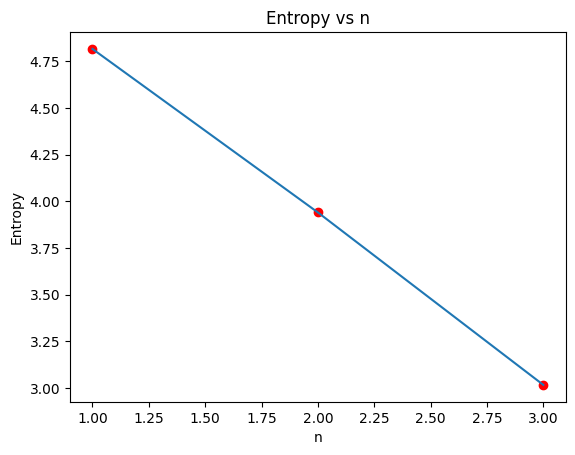

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()

x = np.arange(1,len(entropyList)+1)

plt.scatter(x, entropyList, marker='o', color='red')
plt.plot(x, entropyList)
plt.xlabel('n')
plt.ylabel('Entropy')
plt.title('Entropy vs n')
plt.show()

plt.savefig(f'{filename}/EntropyVsN.png')

In [82]:
print(len(sc.vyanjans)+len(sc.swars)+len(sc.matras))
print(np.log2(61))

60
5.930737337562887
